In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   getdist       import plots, MCSamples 
from   astropy.table import Table
from   vmaxer        import vmaxer
from   lumfn         import lumfn
from   cosmo         import distmod, volcom
from   schechter     import schechter, named_schechter

In [4]:
gama_vmax = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19489,0.03903000056743622,0.26298999786376953,-19.896729767108155,7594841.842906503,3213540.202080313
0.1769,0.03903000056743622,0.22304376921442798,-19.345148105394813,4744480.2327530915,2423819.899631298
0.21845,0.03903000056743622,0.26298999786376953,-21.448400924157312,7594841.842906503,4468890.563670888
0.07737,0.03903000056743622,0.11292987662789934,-17.85082186533015,635194.7011307261,189455.44383488595
0.13108,0.03903000056743622,0.26298999786376953,-21.364310026743254,7594841.842906503,998008.3551280069
0.12964,0.03903000056743622,0.20426831744798465,-19.497313354368224,3682207.0915358975,965422.7798028872
0.22188,0.03903000056743622,0.26242798487028474,-20.131056249548763,7548868.367545325,4673684.697095223
0.1052,0.03903000056743622,0.1478515957436512,-18.506521074289658,1429470.252629071,510520.54314400506


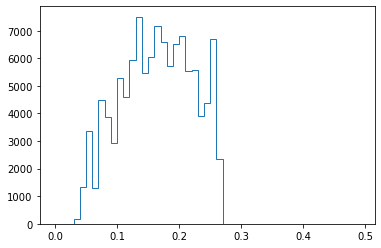

In [5]:
_ = pl.hist(gama_vmax['ZGAMA'], bins=np.arange(0.0, 0.5, 0.01), histtype='step')

In [6]:
Area      = 180.

VV        = volcom(gama_vmax['ZGAMA'].max(), Area) - volcom(gama_vmax['ZGAMA'].min(), Area)
gama_lf   = lumfn(gama_vmax, VV, Ms=np.arange(-25.5, -15.5, 0.2))
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-23.42293176064758,6.583415564696665e-07,6.583415564696665e-07,6.584922190310116e-07,6.584922190310119e-07,1.0,0.9997712006960888
-23.111724644989394,1.316683112939333e-06,9.310355578332154e-07,1.3166831129393332e-06,9.310355578332152e-07,2.0,1.0
-22.976202885033608,4.608390895287666e-06,1.7418080361579235e-06,4.608390895287665e-06,1.7418080361579235e-06,7.0,1.0
-22.756925948044994,2.435863758937766e-05,4.004535351831897e-06,2.4358637589377666e-05,4.004535351831898e-06,37.0,1.0
-22.577140816494108,3.884215183171032e-05,5.05681744712218e-06,3.884215183171032e-05,5.056817447122179e-06,59.0,1.0
-22.388890845189465,0.00010401796592220732,8.275225047455488e-06,0.00010401796592220728,8.275225047455488e-06,158.0,1.0
-22.179204585440715,0.00022581115386909563,1.2192656253105465e-05,0.00022581115386909555,1.2192656253105463e-05,343.0,1.0
-21.981653940855363,0.00035352941582421094,1.5255920354784335e-05,0.0003535294158242109,1.5255920354784336e-05,537.0,1.0
-21.788330480254174,0.0006543915071308485,2.0756038238186342e-05,0.0006543915071308484,2.075603823818635e-05,994.0,1.0


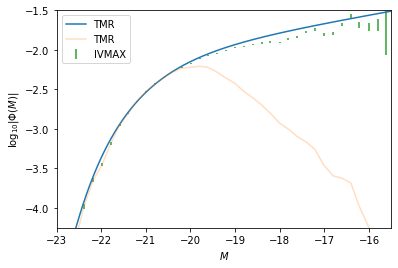

In [7]:
_Ms = np.arange(-23., -15., 0.01)
sc  = named_schechter(_Ms, named_type='TMR')

pl.plot(_Ms, np.log10(sc), label='TMR')

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='TMR', alpha=0.25)

# pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', ls='none')

pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX', ls='none')

pl.xlabel(r'$M$')
pl.ylabel(r'$\log_{10} | \Phi(M) |$')

pl.xlim(-23., -15.5)
pl.ylim(-4.25, -1.5)

pl.legend(frameon=True, loc=2)

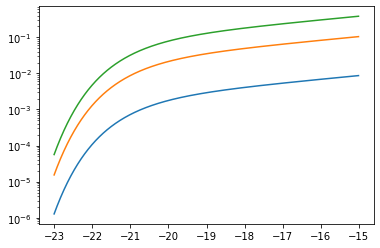

In [16]:
for d8 in [-0.75, 2., 10.]:
    Ms = np.arange(-23., -15., 0.01)
    sc = named_schechter(Ms, named_type='TMR')

    sc *= (1. + d8)
    
    pl.semilogy(Ms, sc)

In [7]:
root = '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/'

In [8]:
dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [9]:
samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [10]:
samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

Removed no burn in


In [11]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [12]:
g = plots.get_subplot_plotter()

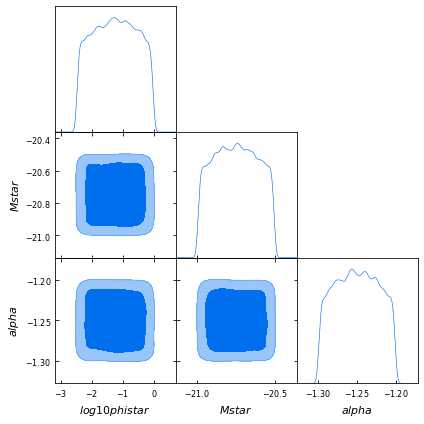

In [13]:
g.triangle_plot([samples], filled=True)        

# Done.